# Telecom Churn - Case Study

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to <b>predict which customers are at high risk of churn</b>.

 
In this project, goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage and identify the main indicators of churn.

## Approach

#### 1. Data Understanding, Preparation, and Pre-Processing
#### 2. Exploratory Data Analysis
#### 3. Feature Engineering and Variable Transformation
#### 4. Model Selection, Model Building, and  Prediction
#### 5. Prediction on test.csv data for Kaggle submission
#### 6. Analysing main indicators of churn




# <u>Importing required libraries</u>

In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt 

from scipy import stats
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Library used to build linear model
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# <u>Sourcing train.csv & test.csv data</u>



In [2]:
# Reading the dataset
churn_train_data = pd.read_csv("train.csv")
churn_test_data = pd.read_csv("test.csv")

# <u>Data Understanding</u>

In [3]:
churn_train_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
churn_test_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [5]:
# Shape of data
print(churn_train_data.shape)
print(churn_test_data.shape)

(69999, 172)
(30000, 171)


In [6]:
churn_train_data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [7]:
# Checking column names in train data
for column in churn_train_data.columns:
    print(column)

id
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc

# <u>Data Cleaning</u>

In [8]:
def check_null_values():
    missing_columns = round(100*(churn_train_data.isnull().sum()/len(churn_train_data.index)), 2)
    pd.options.display.max_columns = 900
    pd.options.display.max_rows = 900  # Set max_rows to a high value
    print(missing_columns.loc[missing_columns > 0].sort_values(ascending=False))
    pd.reset_option('display.max_columns')
    pd.reset_option('display.max_rows')  # Reset max_rows option
    return missing_columns

In [9]:
# If any unique value columns present, dropping them as zero variance features does not help in analysis
for col in churn_train_data.columns:
    if len(churn_train_data[col].unique()) == 1:
        print("Removing column : "+col)
        churn_train_data.drop(col,inplace=True,axis=1)
        churn_test_data.drop(col,inplace=True,axis=1)           

Removing column : circle_id
Removing column : last_date_of_month_6


In [10]:
# Checking % NULL in columns
columns_having_null = check_null_values()

max_rech_data_6             74.90
fb_user_6                   74.90
date_of_last_rech_data_6    74.90
av_rech_amt_data_6          74.90
night_pck_user_6            74.90
count_rech_2g_6             74.90
total_rech_data_6           74.90
arpu_2g_6                   74.90
count_rech_3g_6             74.90
arpu_3g_6                   74.90
arpu_3g_7                   74.48
count_rech_2g_7             74.48
av_rech_amt_data_7          74.48
max_rech_data_7             74.48
total_rech_data_7           74.48
arpu_2g_7                   74.48
date_of_last_rech_data_7    74.48
night_pck_user_7            74.48
fb_user_7                   74.48
count_rech_3g_7             74.48
total_rech_data_8           73.69
max_rech_data_8             73.69
date_of_last_rech_data_8    73.69
count_rech_2g_8             73.69
fb_user_8                   73.69
arpu_3g_8                   73.69
count_rech_3g_8             73.69
night_pck_user_8            73.69
av_rech_amt_data_8          73.69
arpu_2g_8     

In [11]:
# All features having blank or NAN values greater than 70% can be dropped
columns_having_null_70= columns_having_null.loc[columns_having_null >70 ].sort_values(ascending=False).index
print("Removing below columns/features")
print("")
print(columns_having_null_70)

Removing below columns/features

Index(['date_of_last_rech_data_6', 'count_rech_2g_6', 'fb_user_6',
       'night_pck_user_6', 'arpu_2g_6', 'arpu_3g_6', 'count_rech_3g_6',
       'av_rech_amt_data_6', 'max_rech_data_6', 'total_rech_data_6',
       'arpu_3g_7', 'count_rech_2g_7', 'fb_user_7', 'count_rech_3g_7',
       'date_of_last_rech_data_7', 'av_rech_amt_data_7', 'night_pck_user_7',
       'max_rech_data_7', 'total_rech_data_7', 'arpu_2g_7', 'arpu_2g_8',
       'date_of_last_rech_data_8', 'night_pck_user_8', 'max_rech_data_8',
       'arpu_3g_8', 'total_rech_data_8', 'av_rech_amt_data_8',
       'count_rech_3g_8', 'count_rech_2g_8', 'fb_user_8'],
      dtype='object')


In [12]:
# Dropping features having missing data > 70% in both Train and test data
for col in columns_having_null_70:
      churn_train_data.drop(col,inplace=True,axis=1)
      churn_test_data.drop(col,inplace=True,axis=1)   

In [13]:
# Checking shape of train and test data after deletion of 70% missing data columns
print("Train Data Shape : "+str(churn_train_data.shape))
print("Test Data Shape : "+str(churn_test_data.shape))

Train Data Shape : (69999, 140)
Test Data Shape : (30000, 139)


In [14]:
#Checking for null values again
columns_having_null = check_null_values()

std_og_t2c_mou_8        5.29
loc_og_mou_8            5.29
loc_og_t2m_mou_8        5.29
loc_ic_t2f_mou_8        5.29
loc_og_t2f_mou_8        5.29
loc_ic_t2m_mou_8        5.29
loc_og_t2c_mou_8        5.29
loc_ic_t2t_mou_8        5.29
og_others_8             5.29
loc_og_t2t_mou_8        5.29
std_og_t2t_mou_8        5.29
spl_og_mou_8            5.29
std_og_t2m_mou_8        5.29
isd_og_mou_8            5.29
isd_ic_mou_8            5.29
std_og_t2f_mou_8        5.29
loc_ic_mou_8            5.29
std_og_mou_8            5.29
onnet_mou_8             5.29
roam_og_mou_8           5.29
ic_others_8             5.29
spl_ic_mou_8            5.29
std_ic_t2m_mou_8        5.29
roam_ic_mou_8           5.29
std_ic_mou_8            5.29
std_ic_t2f_mou_8        5.29
offnet_mou_8            5.29
std_ic_t2t_mou_8        5.29
std_ic_t2o_mou_8        5.29
std_ic_t2t_mou_6        3.95
spl_ic_mou_6            3.95
spl_og_mou_6            3.95
std_ic_mou_6            3.95
loc_ic_t2t_mou_6        3.95
og_others_6   

In [15]:
# Search T2 (Operator T data) in column list
T2_cols = [k for k in churn_train_data.columns.to_list() if 't2' in k]
print(T2_cols) 

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [16]:
# Search Date in column list
date_cols = [k for k in churn_train_data.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [17]:
# summary
pd.options.display.max_columns = None
print("\n\nSummary statistics\n")
print(churn_train_data[T2_cols].describe(include='all'))
pd.reset_option('display.max_columns')



Summary statistics

       loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  loc_og_t2t_mou_6  \
count         69297.0         69297.0         69297.0      67231.000000   
mean              0.0             0.0             0.0         46.904854   
std               0.0             0.0             0.0        150.971758   
min               0.0             0.0             0.0          0.000000   
25%               0.0             0.0             0.0          1.660000   
50%               0.0             0.0             0.0         11.910000   
75%               0.0             0.0             0.0         40.740000   
max               0.0             0.0             0.0       6431.330000   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      67312.000000      66296.000000      67231.000000      67312.000000   
mean          46.166503         45.686109         93.238231         90.799240   
std          154.739002        153.716880        162.046699

max         1394.890000               0.0               0.0               0.0  


In [18]:
# Dropping the variables which has all the statistics as zero from both train & test data

churn_train_data.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1,inplace = True)
churn_test_data.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1,inplace = True)

In [19]:
# Dropping date variables as we will be using the recharge data for analysis 
# as mostly both says if recharge is done, whereas amount columns give more data for analysis
churn_train_data.drop(date_cols,inplace=True,axis=1)
churn_test_data.drop(date_cols,inplace=True,axis=1)

In [20]:
# Checking shape of train and test data now
print("Train Data Shape : "+str(churn_train_data.shape))
print("Test Data Shape : "+str(churn_test_data.shape))

Train Data Shape : (69999, 126)
Test Data Shape : (30000, 125)


In [21]:
# Checking again the amount of NULL values in columns
columns_having_null = check_null_values()

ic_others_8         5.29
loc_og_t2m_mou_8    5.29
std_og_mou_8        5.29
spl_og_mou_8        5.29
std_og_t2f_mou_8    5.29
og_others_8         5.29
std_og_t2m_mou_8    5.29
loc_ic_t2t_mou_8    5.29
std_og_t2t_mou_8    5.29
loc_ic_t2m_mou_8    5.29
loc_og_mou_8        5.29
loc_ic_t2f_mou_8    5.29
loc_og_t2c_mou_8    5.29
loc_ic_mou_8        5.29
isd_og_mou_8        5.29
std_ic_t2t_mou_8    5.29
loc_og_t2f_mou_8    5.29
std_ic_t2m_mou_8    5.29
spl_ic_mou_8        5.29
onnet_mou_8         5.29
loc_og_t2t_mou_8    5.29
std_ic_t2f_mou_8    5.29
isd_ic_mou_8        5.29
roam_og_mou_8       5.29
std_ic_mou_8        5.29
offnet_mou_8        5.29
roam_ic_mou_8       5.29
ic_others_6         3.95
og_others_6         3.95
loc_ic_t2t_mou_6    3.95
isd_ic_mou_6        3.95
spl_ic_mou_6        3.95
loc_ic_t2m_mou_6    3.95
std_ic_t2m_mou_6    3.95
loc_ic_t2f_mou_6    3.95
loc_ic_mou_6        3.95
std_ic_mou_6        3.95
std_ic_t2t_mou_6    3.95
std_ic_t2f_mou_6    3.95
spl_og_mou_6        3.95


In [22]:
# Removing churn_probabiltity from the list before imputation
columns_having_null= columns_having_null.drop('churn_probability')


In [23]:
# imputation of the mising values of zero values in the train and test set

churn_train_data[columns_having_null.index] = churn_train_data[columns_having_null.index].apply(lambda x: x.fillna(0))
churn_test_data[columns_having_null.index] = churn_test_data[columns_having_null.index].apply(lambda x: x.fillna(0))


In [24]:
# Checking what all columns has null values now
columns_having_null = check_null_values()

Series([], dtype: float64)


In [25]:
# Dropping ID column from both Train as well as Test Data as it is of not much importance
churn_train_data.drop(columns = 'id', axis = 1, inplace = True)
churn_test_data.drop(columns = 'id', axis = 1, inplace = True)

In [26]:
# Checking shape of train and test data
print("Train Data Shape : "+str(churn_train_data.shape))
print("Test Data Shape : "+str(churn_test_data.shape))

Train Data Shape : (69999, 125)
Test Data Shape : (30000, 124)


# <u>Feature Engineering and Variable Transformation</u>

### Create new variable total_arpu

In [27]:
# Create new variable total_arpu: train data
churn_train_data['total_arpu'] = ( churn_train_data['arpu_6'] + churn_train_data['arpu_7'] + churn_train_data['arpu_8']  ) / 3
# Drop redundant column
churn_train_data.drop(['arpu_6', 'arpu_7', 'arpu_8'], axis=1, inplace=True)
churn_train_data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_arpu
0,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,...,0,0,0,0,1958,0.0,0.0,0.0,0,41.937667
1,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,...,0,0,0,0,710,0.0,0.0,0.0,0,55.246667
2,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,...,0,0,0,0,882,0.0,0.0,0.0,0,54.660667
3,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,...,0,0,0,0,982,0.0,0.0,0.0,0,157.572333
4,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,...,0,0,1,0,647,0.0,0.0,0.0,0,156.821333


In [28]:
# Create new variable total_arpu: test data
churn_test_data['total_arpu'] = ( churn_test_data['arpu_6'] + churn_test_data['arpu_7'] + churn_test_data['arpu_8']  ) / 3
# Drop redundant column
churn_test_data.drop(['arpu_6', 'arpu_7', 'arpu_8'], axis=1, inplace=True)
churn_test_data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_arpu
0,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,...,0,0,0,0,0,1692,0.00,0.00,0.00,73.885667
1,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,...,0,0,0,0,0,2533,0.00,0.00,0.00,430.201333
2,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,...,0,0,0,0,0,277,525.61,758.41,241.84,503.655667
3,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,...,0,0,0,0,0,1244,0.00,0.00,0.00,79.780000
4,450.93,609.03,700.68,60.94,23.84,74.16,0.00,0.00,0.00,0.00,...,0,0,0,0,0,462,0.00,0.00,0.00,375.490667


### Create new variable total_rech_amount

In [29]:
# Create new variable total_rech_amount: train data
churn_train_data['total_rech_amount'] = ( churn_train_data['total_rech_amt_8'] + churn_train_data['total_rech_amt_7'] + churn_train_data['total_rech_amt_6']  )
# Drop redundant column
churn_train_data.drop(['total_rech_amt_8', 'total_rech_amt_7', 'total_rech_amt_6'], axis=1, inplace=True)
churn_train_data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_arpu,total_rech_amount
0,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,...,0,0,0,1958,0.0,0.0,0.0,0,41.937667,152
1,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,...,0,0,0,710,0.0,0.0,0.0,0,55.246667,195
2,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,...,0,0,0,882,0.0,0.0,0.0,0,54.660667,190
3,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,...,0,0,0,982,0.0,0.0,0.0,0,157.572333,530
4,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,...,0,1,0,647,0.0,0.0,0.0,0,156.821333,548


In [30]:
# Create new variable total_rech_amount: test data
churn_test_data['total_rech_amount'] = ( churn_test_data['total_rech_amt_8'] + churn_test_data['total_rech_amt_7'] + churn_test_data['total_rech_amt_6']  )
# Drop redundant column
churn_test_data.drop(['total_rech_amt_8', 'total_rech_amt_7', 'total_rech_amt_6'], axis=1, inplace=True)
churn_test_data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_arpu,total_rech_amount
0,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,...,0,0,0,0,1692,0.00,0.00,0.00,73.885667,253
1,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,...,0,0,0,0,2533,0.00,0.00,0.00,430.201333,1500
2,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,...,0,0,0,0,277,525.61,758.41,241.84,503.655667,2500
3,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,...,0,0,0,0,1244,0.00,0.00,0.00,79.780000,370
4,450.93,609.03,700.68,60.94,23.84,74.16,0.00,0.00,0.00,0.00,...,0,0,0,0,462,0.00,0.00,0.00,375.490667,1392


### Create new variable total_rech_num

In [31]:
# Create new variable total_rech_num: train data
churn_train_data['total_rech_num'] = ( churn_train_data['total_rech_num_8'] + churn_train_data['total_rech_num_7'] + churn_train_data['total_rech_num_6']  )
# Drop redundant column
churn_train_data.drop(['total_rech_num_8', 'total_rech_num_7', 'total_rech_num_6'], axis=1, inplace=True)
churn_train_data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_arpu,total_rech_amount,total_rech_num
0,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,...,0,0,1958,0.0,0.0,0.0,0,41.937667,152,7
1,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,...,0,0,710,0.0,0.0,0.0,0,55.246667,195,12
2,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,...,0,0,882,0.0,0.0,0.0,0,54.660667,190,8
3,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,...,0,0,982,0.0,0.0,0.0,0,157.572333,530,9
4,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,...,1,0,647,0.0,0.0,0.0,0,156.821333,548,31


In [32]:
# Create new variable total_rech_num: test data
churn_test_data['total_rech_num'] = ( churn_test_data['total_rech_num_8'] + churn_test_data['total_rech_num_7'] + churn_test_data['total_rech_num_6']  )
# Drop redundant column
churn_test_data.drop(['total_rech_num_8', 'total_rech_num_7', 'total_rech_num_6'], axis=1, inplace=True)
churn_test_data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_arpu,total_rech_amount,total_rech_num
0,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,...,0,0,0,1692,0.00,0.00,0.00,73.885667,253,14
1,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,...,0,0,0,2533,0.00,0.00,0.00,430.201333,1500,14
2,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,...,0,0,0,277,525.61,758.41,241.84,503.655667,2500,20
3,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,...,0,0,0,1244,0.00,0.00,0.00,79.780000,370,10
4,450.93,609.03,700.68,60.94,23.84,74.16,0.00,0.00,0.00,0.00,...,0,0,0,462,0.00,0.00,0.00,375.490667,1392,26


In [33]:
# Checking shape of train and test data after new variables
print("Train Data Shape : "+str(churn_train_data.shape))
print("Test Data Shape : "+str(churn_test_data.shape))

Train Data Shape : (69999, 119)
Test Data Shape : (30000, 118)


# <u>Visualising the Data and performing EDA</u>
- Multicollinearity can be caught here, if any variables are related
- We may also get to know if any strong relation of any variable with target variable

In [34]:
# Let's analyse dependent variable i.e Churn Probability

churn_train_data['churn_probability'].describe()

count    69999.000000
mean         0.101887
std          0.302502
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn_probability, dtype: float64

In [35]:
churn_train_data['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

Skewness: 2.632208


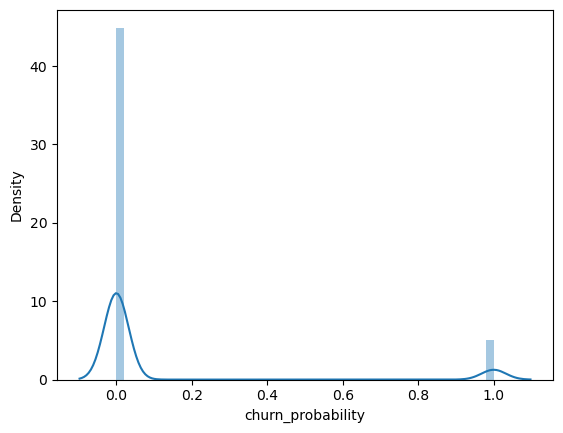

In [36]:
#Let's find out if the target variable is normally distributed??
sns.distplot(churn_train_data['churn_probability']) 
#skewness
print("Skewness: %f" % churn_train_data['churn_probability'].skew())

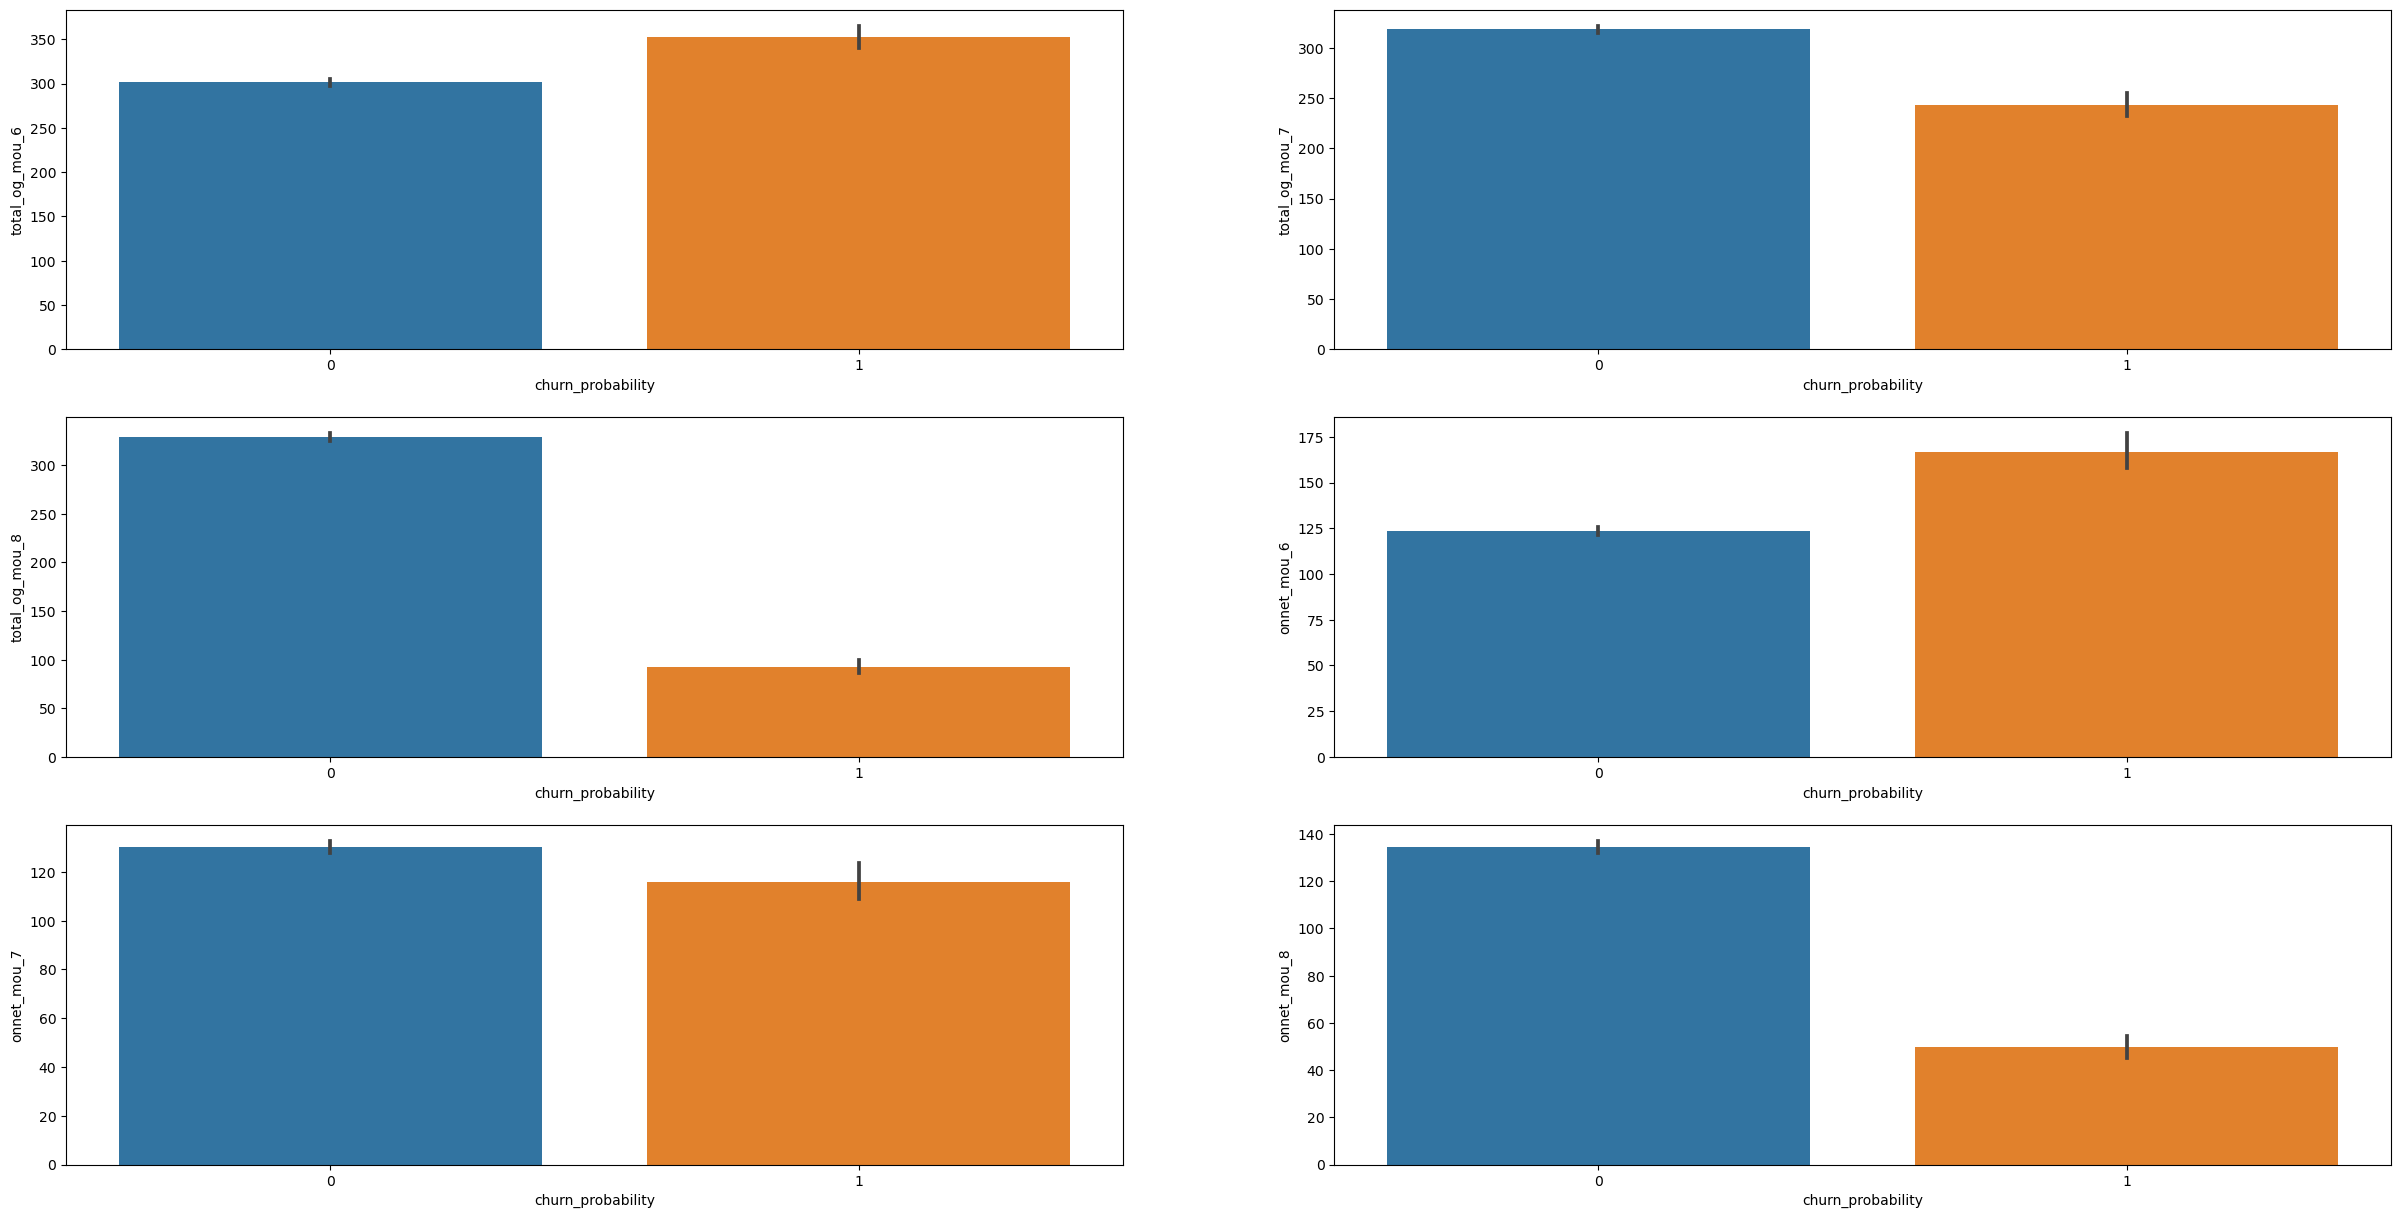

In [37]:
# bar plot of important features with churn_probability.
plt.figure(figsize=(30, 15))
plt.subplot(3,2,1)
sns.barplot(x='churn_probability', y='total_og_mou_6', data=churn_train_data)
plt.subplot(3,2,2)
sns.barplot(x='churn_probability', y='total_og_mou_7', data=churn_train_data)
plt.subplot(3,2,3)
sns.barplot(x='churn_probability', y='total_og_mou_8', data=churn_train_data)
plt.subplot(3,2,4)
sns.barplot(x='churn_probability', y='onnet_mou_6', data=churn_train_data)
plt.subplot(3,2,5)
sns.barplot(x='churn_probability', y='onnet_mou_7', data=churn_train_data)
plt.subplot(3,2,6)
sns.barplot(x='churn_probability', y='onnet_mou_8', data=churn_train_data)
plt.show()

## Univariate EDA

In [38]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        


count    69999.000000
mean       280.059701
std        310.243414
min         13.426667
25%        105.545833
50%        199.662667
75%        356.245000
max      32140.182000
Name: total_arpu, dtype: float64


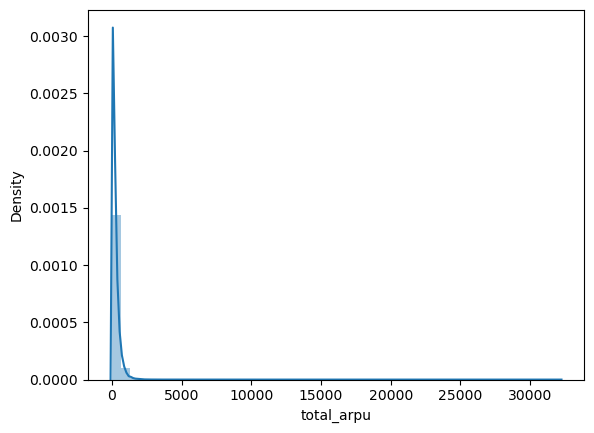

In [39]:
univariate(churn_train_data.total_arpu)

count    69999.000000
mean        22.498121
std         18.532104
min          0.000000
25%         11.000000
50%         17.000000
75%         28.000000
max        366.000000
Name: total_rech_num, dtype: float64


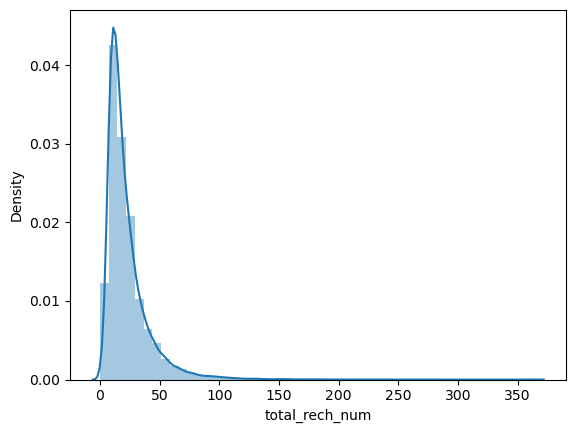

In [40]:
univariate(churn_train_data.total_rech_num)

count     69999.000000
mean        974.362505
std        1106.099526
min           0.000000
25%         360.000000
50%         692.000000
75%        1244.000000
max      120845.000000
Name: total_rech_amount, dtype: float64


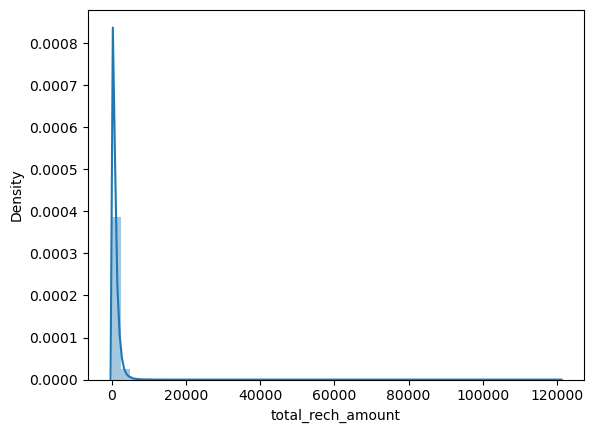

In [41]:
univariate(churn_train_data.total_rech_amount)

Variables are very **skewed** towards the left.

## Bivariate EDA

<AxesSubplot:xlabel='churn_probability', ylabel='aon'>

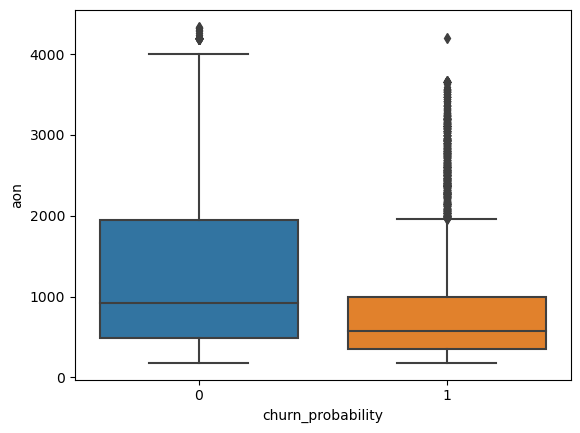

In [42]:
sns.boxplot(churn_train_data.churn_probability, churn_train_data.aon)

<AxesSubplot:xlabel='churn_probability', ylabel='total_ic_mou_8'>

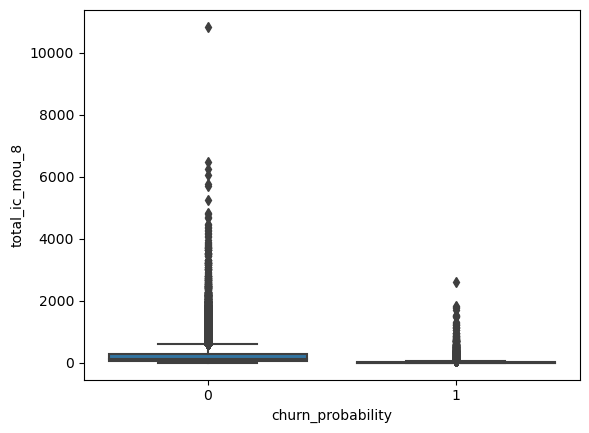

In [43]:
sns.boxplot(churn_train_data.churn_probability, churn_train_data.total_ic_mou_8)

<AxesSubplot:xlabel='churn_probability', ylabel='loc_ic_t2m_mou_8'>

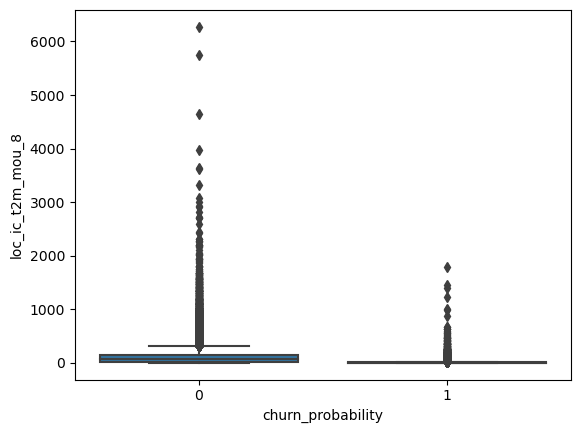

In [44]:
sns.boxplot(churn_train_data.churn_probability, churn_train_data.loc_ic_t2m_mou_8)

<AxesSubplot:xlabel='churn_probability', ylabel='total_og_mou_8'>

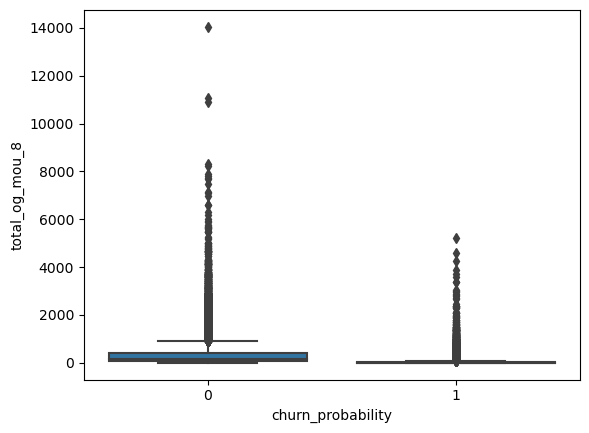

In [45]:
sns.boxplot(churn_train_data.churn_probability, churn_train_data.total_og_mou_8)

In [46]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [47]:
#Getting all numerical variables
numericVars = churn_train_data.select_dtypes(include = np.number).columns.tolist()
numericVars.remove('churn_probability')
numericVars

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 

In [48]:
# cap outliers in the numeric columns
churn_train_data[numericVars] = churn_train_data[numericVars].apply(cap_outliers, axis=0)

# <u>Model Selection, Model Building, and  Prediction</u>

## Preprocessing data

### Train Test split

In [49]:
# divide data into train and test
X = churn_train_data.drop("churn_probability", axis = 1)
y = churn_train_data.churn_probability


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

## PCA

In [50]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA(random_state=42))])

In [51]:
pca.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(random_state=42))])

In [52]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

churn_test_data_pca = pca.fit_transform(churn_test_data)


In [53]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
pd.options.display.max_columns = 900
pd.options.display.max_rows = 900  # Set max_rows to a high value
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')  # Reset max_rows option

0       12.54
1       20.36
2       25.66
3       30.42
4       33.97
5       37.24
6       40.02
7       42.74
8       45.31
9       47.75
10      50.12
11      52.40
12      54.50
13      56.55
14      58.55
15      60.46
16      62.25
17      63.83
18      65.38
19      66.87
20      68.32
21      69.66
22      70.91
23      72.04
24      73.15
25      74.19
26      75.20
27      76.13
28      76.99
29      77.81
30      78.61
31      79.39
32      80.14
33      80.86
34      81.57
35      82.24
36      82.89
37      83.52
38      84.14
39      84.76
40      85.36
41      85.95
42      86.53
43      87.10
44      87.61
45      88.11
46      88.58
47      89.03
48      89.47
49      89.90
50      90.32
51      90.71
52      91.10
53      91.47
54      91.84
55      92.18
56      92.51
57      92.84
58      93.16
59      93.47
60      93.78
61      94.08
62      94.38
63      94.67
64      94.95
65      95.22
66      95.49
67      95.75
68      96.00
69      96.24
70      96.47
71    

- Approx. 51 components explain 90% variance
- Approx. 67 components explain 95% variance

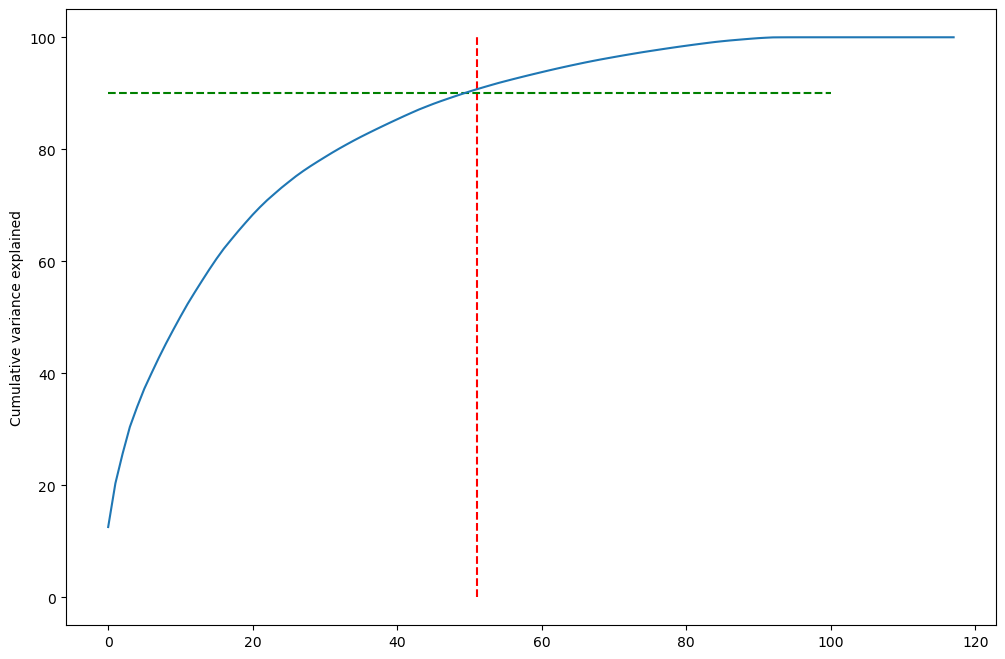

In [54]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
fig = plt.figure(figsize=[12,8])
#43 components explaining 90% variance
plt.vlines(x=51, ymax=100, ymin=0, colors="r", linestyles="--")
plt.hlines(y=90, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(cumulative_variance)
plt.ylabel("Cumulative variance explained")
plt.show()

In [55]:
pca_cols = [f'pc_{i}' for i in range(1,119)]

In [56]:
X_train_pca=pd.DataFrame(columns=pca_cols,data=X_train_pca)
X_test_pca=pd.DataFrame(columns=pca_cols,data=X_test_pca)

In [57]:
X_train_pca.head(5)

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,...,pc_109,pc_110,pc_111,pc_112,pc_113,pc_114,pc_115,pc_116,pc_117,pc_118
0,0.500091,-0.492251,-2.286263,-2.570163,-1.593808,1.159118,0.276942,0.431697,0.064956,-0.177043,...,-0.010664,0.042313,0.050826,-0.033802,-0.018939,0.003638,0.016614,0.005471,-0.017774,0.006785
1,-1.698929,4.049900,0.012361,-0.455613,0.201336,0.551350,0.470112,0.324134,-0.172277,2.152145,...,0.000391,0.046131,-0.096179,0.133986,0.042503,-0.005587,-0.020954,-0.001677,-0.000813,-0.002812
2,-4.389875,-0.522466,-1.111222,-0.395779,0.409801,0.035345,-0.150774,-0.403189,0.243053,-0.157697,...,0.000954,0.006938,0.002139,0.004433,0.011528,-0.008282,-0.007685,0.001100,0.001356,0.000146
3,-3.253150,-0.130582,4.002531,-1.104204,-2.259206,-0.544301,-1.041325,-0.301276,0.049296,-0.361577,...,0.005851,-0.003372,0.011578,-0.005070,0.003449,-0.002134,0.004172,0.006689,-0.003962,0.000365
4,-4.609651,0.354670,-0.772216,-0.298945,0.720556,-0.392546,-0.184555,-0.681460,0.594150,1.085707,...,-0.004226,0.008893,-0.009278,0.014176,0.013387,-0.006073,0.004932,0.000680,-0.007863,0.000702


In [58]:
X_test_pca.head(5)

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,...,pc_109,pc_110,pc_111,pc_112,pc_113,pc_114,pc_115,pc_116,pc_117,pc_118
0,-1.599743,0.677402,-0.331126,2.622288,0.863999,-0.871281,0.663604,-0.807417,-0.428947,-0.824971,...,0.041584,0.097156,-0.005994,0.031221,-0.020101,-0.059560,-0.020337,-0.044899,-0.001428,-0.008306
1,-5.119307,-0.356960,-0.620846,-0.103329,-0.916846,0.250059,-0.260294,-0.218603,-0.371776,-0.107255,...,-0.001051,0.006887,0.003827,0.003127,-0.000583,0.000662,-0.001552,0.000648,0.001946,-0.001373
2,2.248542,-1.981403,-3.273260,-2.094635,0.791501,-1.992708,0.729401,-0.408760,-1.757161,-0.621071,...,0.020073,-0.015436,0.027340,-0.008270,0.003618,-0.040071,-0.013819,0.010099,0.002670,0.001076
3,-1.137165,-1.888324,-2.055649,-0.167102,0.558006,-0.547423,0.134347,-0.652242,-1.216118,0.336072,...,-0.029492,-0.048623,0.012286,-0.002833,-0.024584,-0.028657,0.013203,0.018018,0.004668,0.005913
4,5.588169,-5.964616,0.551994,1.278993,2.354249,0.518026,4.590664,-0.692243,-0.207655,2.564042,...,-0.082470,-0.127664,0.002613,0.125849,-0.093564,-0.173101,-0.006012,0.255268,0.025138,0.022966


## <u>Logistic Regression with PCA</u>

In [59]:
def analyse_regression(model_pipeline, X_test, X_train, y_pred, y_test):
    # create onfusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix is as follow:")
    print("")
    print(cm)

    print("")
    print("")
    # check sensitivity and specificity
    sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
    print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

    # check area under curve
    y_pred_prob = model_pipeline.predict_proba(X_test)[:, 1]
    print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

    # Measure accuracy
    print("Train accuracy:", np.round(accuracy_score(y_train, model_pipeline.predict(X_train)), 2))
    print("Test accuracy:", np.round(accuracy_score(y_test,  y_pred), 2))
    
    print("")
    print("Classification Report is as follow:")
    print("")
    print(classification_report(y_test, y_pred))
    
    sns.heatmap(cm, annot=True, cmap='Reds')
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('True', fontsize=12)


### Applying logistic regression on the data on PCA components


In [60]:
# create pipeline
PCA_VARS = 67
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS,random_state=42)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [61]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.7943960837349283

### Evaluate on test data

Confusion Matrix is as follow:

[[12392  3325]
 [  267  1516]]


Sensitivity: 	0.85
Specificity: 	0.79
AUC:    	 0.89
Train accuracy: 0.79
Test accuracy: 0.79

Classification Report is as follow:

              precision    recall  f1-score   support

           0       0.98      0.79      0.87     15717
           1       0.31      0.85      0.46      1783

    accuracy                           0.79     17500
   macro avg       0.65      0.82      0.67     17500
weighted avg       0.91      0.79      0.83     17500



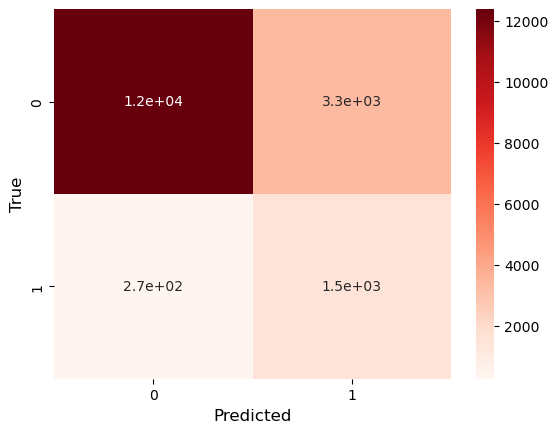

In [62]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

analyse_regression(pipeline, X_test, X_train, y_pred, y_test)

### Accuracies of Logistic Regression with PCA
- Train accuracy: 0.79
- Test accuracy: 0.79

### Hyper parameter tuning in Logistic Regression with PCA

In [63]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.898112
1    0.101888
Name: churn_probability, dtype: float64

In [64]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [67], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [65]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [67]},
             scoring='roc_auc', verbose=1)

In [66]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.245963,0.027640,0.000000,0.000000,0.1,l1,67,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,3.707915,0.539016,0.099704,0.020537,0.1,l2,67,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.889514,0.894628,0.880829,0.889587,0.895882,0.890088,0.005301,2
2,2.881120,0.084051,0.000000,0.000000,0.5,l1,67,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,3.395078,0.098588,0.089696,0.007296,0.5,l2,67,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.889703,0.895240,0.880614,0.889333,0.895746,0.890127,0.005459,1
4,2.741652,0.033159,0.000000,0.000000,1,l1,67,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
5,3.443764,0.054546,0.090474,0.007656,1,l2,67,"{'logistic__C': 1, 'logistic__penalty': 'l2', ...",0.889985,0.894111,0.880881,0.889465,0.895689,0.890026,0.005152,3
6,2.722201,0.081709,0.000000,0.000000,2,l1,67,"{'logistic__C': 2, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,3.487781,0.045549,0.112987,0.011436,2,l2,67,"{'logistic__C': 2, 'logistic__penalty': 'l2', ...",0.889775,0.894911,0.880701,0.889006,0.895651,0.890009,0.005358,4
8,2.944482,0.063814,0.000000,0.000000,3,l1,67,"{'logistic__C': 3, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,3.605280,0.118170,0.133612,0.025550,3,l2,67,"{'logistic__C': 3, 'logistic__penalty': 'l2', ...",0.889622,0.894507,0.880360,0.889282,0.895543,0.889863,0.005376,8


In [67]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8901273700942347
Best hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 67}


Confusion Matrix is as follow:

[[12341  3376]
 [  261  1522]]


Sensitivity: 	0.85
Specificity: 	0.79
AUC:    	 0.89
Train accuracy: 0.79
Test accuracy: 0.79

Classification Report is as follow:

              precision    recall  f1-score   support

           0       0.98      0.79      0.87     15717
           1       0.31      0.85      0.46      1783

    accuracy                           0.79     17500
   macro avg       0.65      0.82      0.66     17500
weighted avg       0.91      0.79      0.83     17500



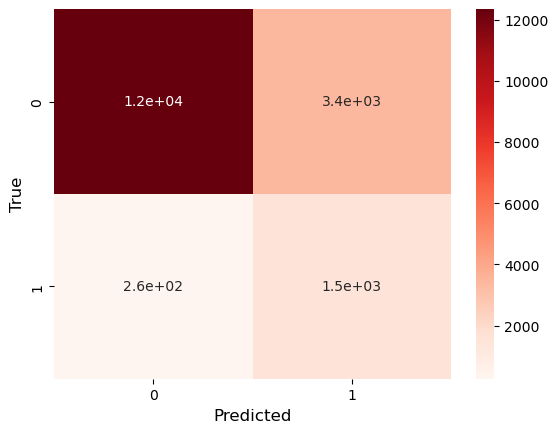

In [68]:
# predict churn on test data
y_pred = model.predict(X_test)

analyse_regression(pipeline, X_test, X_train, y_pred, y_test)

### Accuracies of Logistic Regression with PCA & hyperparameter tuning
- Train accuracy: 0.79
- Test accuracy: 0.79
    
Not much difference with hyperparameter tuning so trying out Random Forest Classifier

 ## <u>Random Forest with Hyperparameter tuning</u>

In [69]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

# hyperparameter space
params = {
        'n_estimators' : [250],
        'max_depth' : [7], 
        'max_features' : [30],
        'min_samples_split':[3, 4],
        'min_samples_leaf':[1,2],
        "class_weight":['balanced', {0:1,1:10}]
    }


# create 3 folds
folds = StratifiedKFold(n_splits = 3)

# create gridsearch object
rf_model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='accuracy', n_jobs=-1, verbose=1)

In [70]:
# fit model
rf_model.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(max_depth=4, max_features=5,
                                              n_estimators=10, oob_score=True,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', {0: 1, 1: 10}],
                         'max_depth': [7], 'max_features': [30],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [3, 4], 'n_estimators': [250]},
             scoring='accuracy', verbose=1)

In [71]:
# print best hyperparameters
print("Best Accuracy: ", rf_model.best_score_)
print("Best hyperparameters: ", rf_model.best_params_)
print("Best estimators: ", rf_model.best_estimator_)


Best Accuracy:  0.9223985610062072
Best hyperparameters:  {'class_weight': 'balanced', 'max_depth': 7, 'max_features': 30, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 250}
Best estimators:  RandomForestClassifier(class_weight='balanced', max_depth=7, max_features=30,
                       min_samples_split=3, n_estimators=250, oob_score=True,
                       random_state=100)


### Evaluate on test data

Confusion Matrix is as follow:

[[14688  1029]
 [  358  1425]]


Sensitivity: 	0.8
Specificity: 	0.93
AUC:    	 0.94
Train accuracy: 0.93
Test accuracy: 0.92

Classification Report is as follow:

              precision    recall  f1-score   support

           0       0.98      0.93      0.95     15717
           1       0.58      0.80      0.67      1783

    accuracy                           0.92     17500
   macro avg       0.78      0.87      0.81     17500
weighted avg       0.94      0.92      0.93     17500



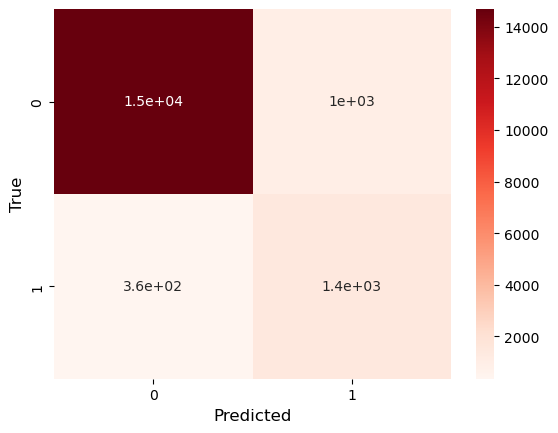

In [72]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

analyse_regression(rf_model.best_estimator_, X_test, X_train, y_pred, y_test)

### Accuracies of Random Forest
- Train accuracy: 0.93
- Test accuracy: 0.92

 ## <u>Random Forest with PCA & Hyperparameter tuning</u>

In [74]:
params = {'n_estimators': [100,200,300],
          "max_depth":[8,11,13],
          "min_samples_leaf":[4],
          "n_jobs":[-1]
          }


# using class_weight to handle inbalance class dataset
rclf = RandomForestClassifier(class_weight='balanced')

# cross validation
folds=5
rclf_cv = GridSearchCV(estimator = rclf,
                        param_grid = params, 
                        scoring= 'accuracy',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            

rclf_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [8, 11, 13], 'min_samples_leaf': [4],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-1]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [75]:
rclf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [76]:
rclf_cv.best_params_

{'max_depth': 13, 'min_samples_leaf': 4, 'n_estimators': 200, 'n_jobs': -1}

In [77]:
rclf_cv_df = pd.DataFrame(rclf_cv.cv_results_)
rclf_cv_df.sort_values(by=['rank_test_score']).head(100)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,param_n_jobs,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
7,22.509910,0.537539,0.112693,0.020065,13,4,200,-1,"{'max_depth': 13, 'min_samples_leaf': 4, 'n_es...",0.903714,...,0.906132,0.002943,1,0.957451,0.956094,0.956189,0.955904,0.956095,0.956347,0.000560
8,32.422921,0.711859,0.132827,0.008109,13,4,300,-1,"{'max_depth': 13, 'min_samples_leaf': 4, 'n_es...",0.904286,...,0.905922,0.002334,2,0.957309,0.956070,0.955832,0.956142,0.956405,0.956352,0.000512
6,11.537586,0.223983,0.061632,0.009183,13,4,100,-1,"{'max_depth': 13, 'min_samples_leaf': 4, 'n_es...",0.902762,...,0.905332,0.002500,3,0.955166,0.956713,0.954332,0.956856,0.956857,0.955985,0.001044
3,9.682154,0.480790,0.056504,0.005633,11,4,100,-1,"{'max_depth': 11, 'min_samples_leaf': 4, 'n_es...",0.895048,...,0.896989,0.001889,4,0.935427,0.933832,0.934427,0.935689,0.934929,0.934861,0.000672
5,31.209889,1.090204,0.138130,0.008532,11,4,300,-1,"{'max_depth': 11, 'min_samples_leaf': 4, 'n_es...",0.896571,...,0.896912,0.001753,5,0.937237,0.934427,0.935760,0.934689,0.934310,0.935284,0.001103
4,20.328635,0.799956,0.091902,0.008937,11,4,200,-1,"{'max_depth': 11, 'min_samples_leaf': 4, 'n_es...",0.895524,...,0.895922,0.001725,6,0.936998,0.934522,0.934046,0.933903,0.933643,0.934623,0.001222
2,23.352038,0.233830,0.114629,0.009318,8,4,300,-1,"{'max_depth': 8, 'min_samples_leaf': 4, 'n_est...",0.869524,...,0.868340,0.001588,7,0.889450,0.888640,0.887164,0.888593,0.886786,0.888126,0.000996
0,9.643617,1.062184,0.054813,0.006556,8,4,100,-1,"{'max_depth': 8, 'min_samples_leaf': 4, 'n_est...",0.869619,...,0.868093,0.003381,8,0.891212,0.886283,0.889474,0.887783,0.885690,0.888088,0.002038
1,16.988678,1.428711,0.081760,0.008568,8,4,200,-1,"{'max_depth': 8, 'min_samples_leaf': 4, 'n_est...",0.868190,...,0.867198,0.002545,9,0.887593,0.887331,0.887735,0.889164,0.887452,0.887855,0.000668


### Evaluate on test data

Confusion Matrix is as follow:

[[15573   144]
 [ 1743    40]]


Sensitivity: 	0.02
Specificity: 	0.99
AUC:    	 0.72
Train accuracy: 0.95
Test accuracy: 0.89

Classification Report is as follow:

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     15717
           1       0.22      0.02      0.04      1783

    accuracy                           0.89     17500
   macro avg       0.56      0.51      0.49     17500
weighted avg       0.83      0.89      0.85     17500



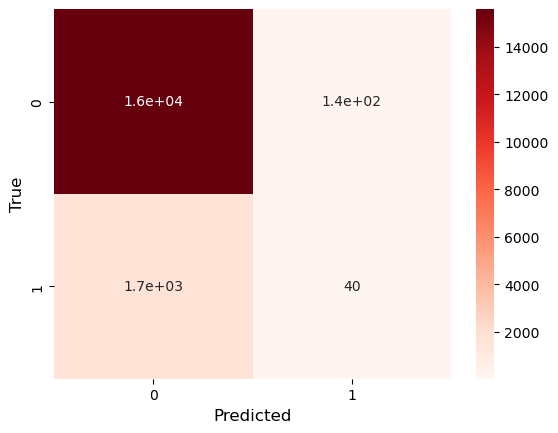

In [80]:
# predict churn on test data
y_pred = rclf_cv.best_estimator_.predict(X_test_pca)

analyse_regression(rclf_cv.best_estimator_, X_test_pca, X_train_pca, y_pred, y_test)

In [81]:
rclf_cv.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=13,
                       min_samples_leaf=4, n_estimators=200, n_jobs=-1)

### Accuracies of Random Forest with PCA & hyperparameter tuning
- Train accuracy: 0.95
- Test accuracy: 0.89

Test accuracy is lesser hence we would have to go for the Regression model of Random Forest with HyperParameter Tuning

## <u>Creating Prediction's submission file for Kaggle</u>

### Choosing best features from the random forest algorithm

### Evaluate on test data

Confusion Matrix is as follow:

[[14688  1029]
 [  358  1425]]


Sensitivity: 	0.8
Specificity: 	0.93
AUC:    	 0.94
Train accuracy: 0.93
Test accuracy: 0.92

Classification Report is as follow:

              precision    recall  f1-score   support

           0       0.98      0.93      0.95     15717
           1       0.58      0.80      0.67      1783

    accuracy                           0.92     17500
   macro avg       0.78      0.87      0.81     17500
weighted avg       0.94      0.92      0.93     17500



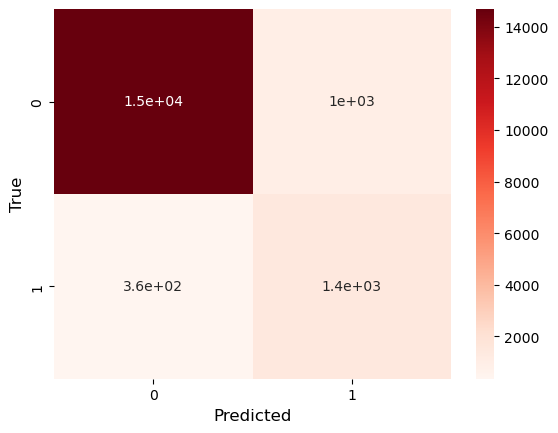

In [86]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

analyse_regression(rf_model, X_test, X_train, y_pred, y_test)


### Predicting on test data

In [102]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model_best = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

11


In [103]:
# fit model
rf_model_best.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   17.1s


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=11,
                       oob_score=True, random_state=4, verbose=1)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


Confusion Matrix is as follow:

[[15432   285]
 [  760  1023]]


Sensitivity: 	0.57
Specificity: 	0.98
AUC:    	 0.94
Train accuracy: 0.93
Test accuracy: 0.94

Classification Report is as follow:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     15717
           1       0.78      0.57      0.66      1783

    accuracy                           0.94     17500
   macro avg       0.87      0.78      0.81     17500
weighted avg       0.94      0.94      0.94     17500



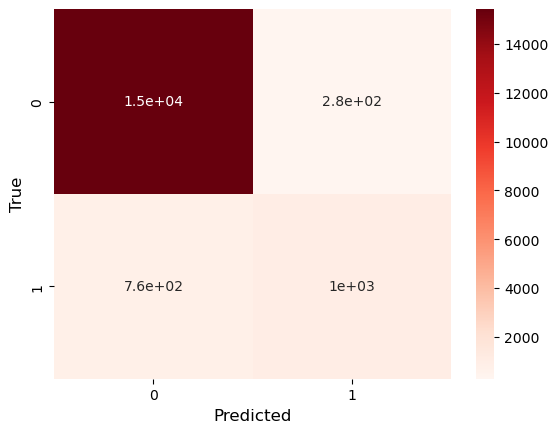

In [94]:
# predict churn on test data
y_pred = rf_model_best.predict(X_test)

analyse_regression(rf_model, X_test, X_train, y_pred, y_test)

In [109]:
# predict churn on test data
y_pred_complete = rf_model_best.predict(churn_test_data)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


In [110]:
solution = pd.read_csv('sample.csv')
solution.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [111]:
solution['churn_probability'] = y_pred_complete

print(solution['churn_probability'].value_counts())

solution.to_csv('prediction.csv', index=False)

0    27734
1     2266
Name: churn_probability, dtype: int64


## <u>Analysing main indicators of churn</u>

### Feature Importance

In [107]:
# predictors
features = churn_train_data.drop('churn_probability', axis=1).columns

# feature_importance
importance = rf_model_best.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,7.713693
1,loc_ic_mou_8,6.770276
2,loc_ic_t2m_mou_8,5.898305
3,loc_ic_t2t_mou_8,5.778929
4,total_og_mou_8,4.353762
...,...,...
113,monthly_3g_6,0.056793
114,monthly_2g_7,0.050425
115,monthly_2g_6,0.045147
116,og_others_8,0.009276


<h2>Below are the top features</h2>

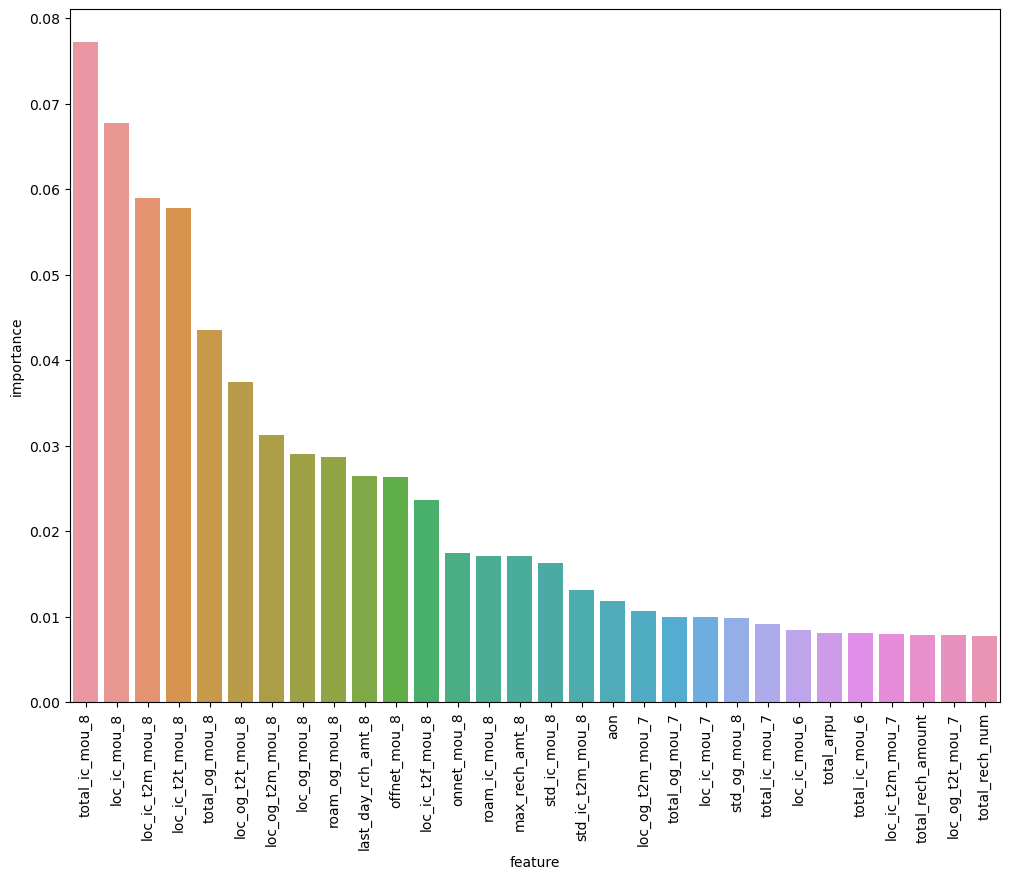

In [108]:
rf_df_telecom_churn = pd.DataFrame({'feature' : churn_train_data.drop('churn_probability', axis=1).columns, 'importance' : rf_model_best.feature_importances_})
rf_df_telecom_churn = rf_df_telecom_churn.sort_values(by = 'importance', ascending = False).head(30)
fig = plt.figure(figsize = (12, 9))
sns.barplot(data = rf_df_telecom_churn, y = 'importance', x = 'feature')
plt.xticks(rotation=90)
plt.show()

## Conclusion
- We have used Random Forest as final model to create sample solution as it is giving test accuracy for 94%
- August month's data is very useful in predicting as most of the important features belongs to august month
- We can see various trends in august month like incoming and outgoing calls, last recharge date etc

